In [28]:
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jaxley as jx
from jaxley.channels import Na, K, Leak

## 1. Steady-State

### a) Single Compartment

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param,Leak,Leak_gLeak,Leak_eLeak
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,0,0,True,0.0001,-70.0


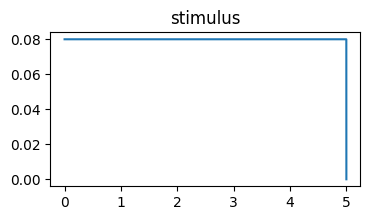

In [115]:
# create compartment 
comp = jx.Compartment()
comp.insert(Leak())

# create stimulus
dt = 0.001
tmax = 5
dur = 5
i_amp = 0.08

time_vec = np.arange(0, tmax + dt, dt)
current = jx.step_current(0, tmax, i_amp, dt, tmax)
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
_ = plt.plot(time_vec, current)
plt.title('stimulus')

comp.nodes


Added 1 external_states. See `.externals` for details.
Added 1 recordings. See `.recordings` for details.
gleak=0.01 	 v=-57.39
gleak=0.005 	 v=-44.66
gleak=0.001 	 v=56.34


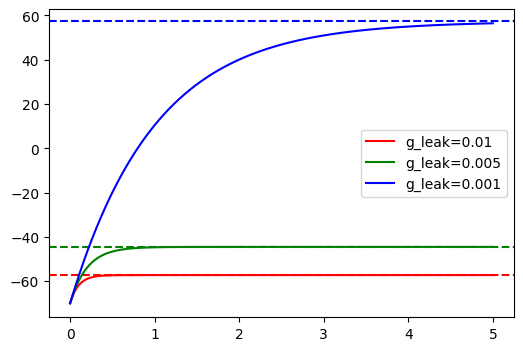

In [136]:
# set stimulation and recording sitres and run simulation
comp.delete_stimuli()
comp.delete_recordings()

comp.stimulate(current)
comp.record("v")

comp.set("capacitance", 1)


gleaks = [1e-2, 5e-3, 1e-3]
colors = ['r', 'g', 'b']

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i, gleak in enumerate(gleaks):
    comp.set("Leak_gLeak", gleak) 
    
    steady_state = i_amp * 1e-6 / (comp.nodes.get("Leak_gLeak") *  2 * np.pi * comp.nodes.get("radius") *  1e-4 * comp.nodes.get("length") * 1e-4) + comp.nodes.get("Leak_eLeak")
    
    voltages = jx.integrate(comp, delta_t=dt)
    ax.plot(time_vec, voltages[0][:-1], color=colors[i], label=f"g_leak={gleak}")
    ax.axhline(steady_state.values[0], color=colors[i], linestyle='--')
    
    print(f"gleak={gleak} \t v={voltages[0][-1]:.2f}")
    
plt.legend()
plt.show()


### b) Length and time constants

In [143]:
# create linear connected compartment

comp = jx.Compartment()
comp.set('length', 2) 
branch = jx.Branch(comp, ncomp=100)
branch.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,2.0,1.0,5000.0,1.0,-70.0,0,0,0,0
1,0,0,1,2.0,1.0,5000.0,1.0,-70.0,0,0,1,0
2,0,0,2,2.0,1.0,5000.0,1.0,-70.0,0,0,2,0
3,0,0,3,2.0,1.0,5000.0,1.0,-70.0,0,0,3,0
4,0,0,4,2.0,1.0,5000.0,1.0,-70.0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,95,2.0,1.0,5000.0,1.0,-70.0,0,0,95,0
96,0,0,96,2.0,1.0,5000.0,1.0,-70.0,0,0,96,0
97,0,0,97,2.0,1.0,5000.0,1.0,-70.0,0,0,97,0
98,0,0,98,2.0,1.0,5000.0,1.0,-70.0,0,0,98,0
